# A journey trough Winery Dataset

### Exploratory Data Analysis

##### Created by: Polin Tsenova

From centuries people produce, taste and even collect wines. It is an alcoholic drink typically made from fermented grape juice. Wine is useful for the health in small quantities, plays an important role in some religions and is used for culinary purposes. 

This is a notebook which explores people preferenses, wines rating and prices and presents the results by visual figures.

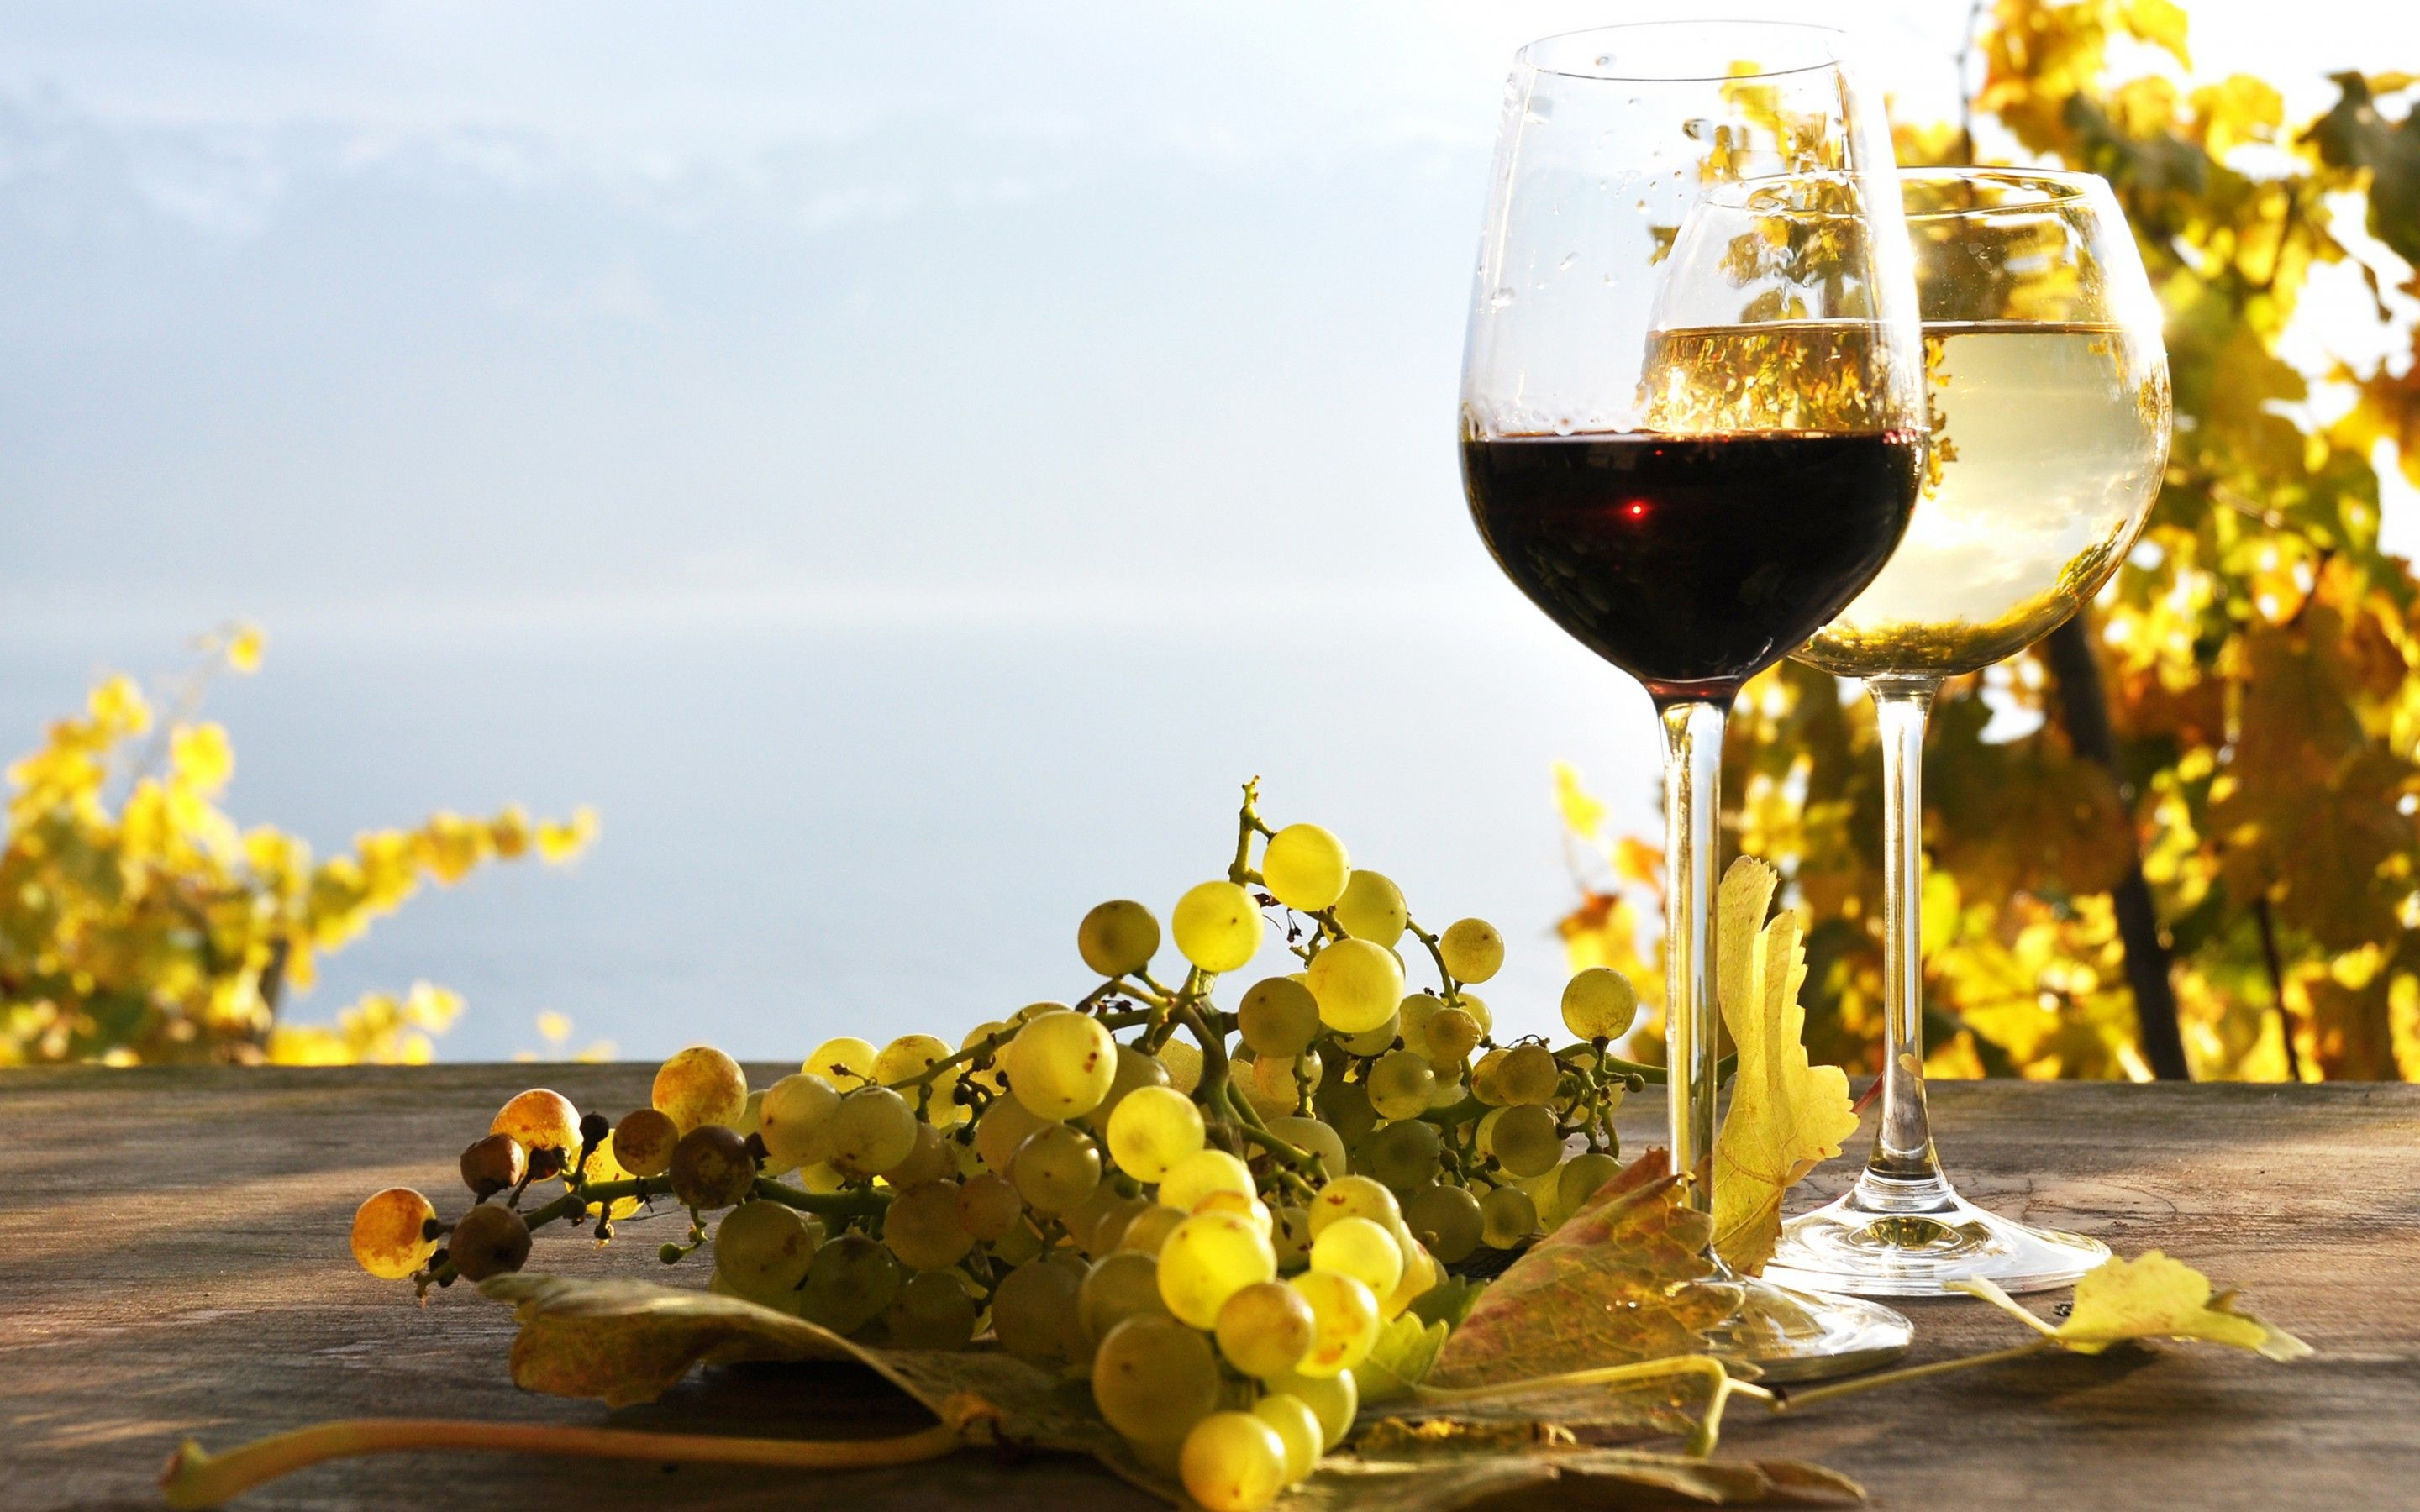

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Read Data

In [2]:
wines = pd.read_csv('Wines.csv')

### Initial Data Exploration

In [3]:
wines.head()

Name        Country       Region  \
0               Chardonnay 2018      Australia     Riverina   
1        Salanques Priorat 2016          Spain      Priorat   
2           Reserve Merlot 2016   South Africa   Walker Bay   
3          Ventoux Artemia 2015         France      Ventoux   
4  Devil's Candy Red Blend 2017  United States  Napa Valley   

                 Winery  Rating  NumberOfRatings  Price  Year   Type  
0             Pokerface     3.4               30   7.35  2018  White  
1              Mas Doix     4.1              374  35.70  2016    Red  
2              Creation     4.0               52  36.00  2016    Red  
3       Château Pesquie     4.0              125  32.90  2015    Red  
4  689 - Six Eight Nine     4.4               83  38.50  2017    Red

In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13090 entries, 0 to 13089
Data columns (total 9 columns):
Name               13090 non-null object
Country            13090 non-null object
Region             13090 non-null object
Winery             13090 non-null object
Rating             13090 non-null float64
NumberOfRatings    13090 non-null int64
Price              13090 non-null float64
Year               13090 non-null int64
Type               13090 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 920.5+ KB


In [5]:
wines.describe()

Rating  NumberOfRatings         Price          Year
count  13090.000000     13090.000000  13090.000000  13090.000000
mean       3.868877       331.887777     33.490910   2015.531780
std        0.298953       734.794482     72.603154      3.276464
min        2.500000        25.000000      3.550000   1961.000000
25%        3.700000        55.000000      9.900000   2015.000000
50%        3.900000       122.000000     15.950000   2016.000000
75%        4.100000       311.000000     32.500000   2018.000000
max        4.900000     20293.000000   3410.790000   2020.000000

### Data Analysis

#### Question 1. Does preference differ by much between wines categories types? 

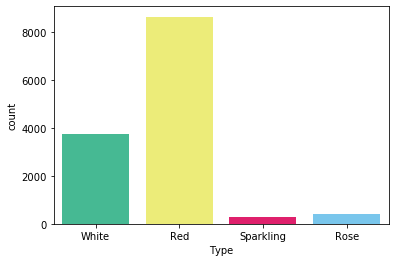

In [7]:
sns.countplot(wines['Type'], palette = ['#33CC99','#FFFF66','#FF0066','#66CCFF'])

On a whole people prefer more traditional types of wine - red and white, as red is twice more preffered than the white wine.

#### Question 2. What does the distribution of customer ratings look like? Is it skewed?

Mean is 3.8688770053475903


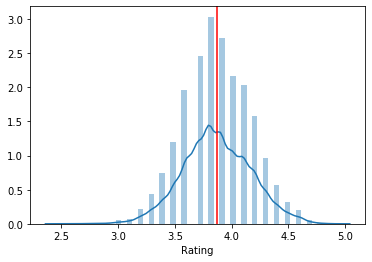

In [43]:
sns.distplot(wines['Rating'])
plt.axvline(x=np.mean(wines['Rating']),c='red', label='mean')
print(f"Mean is {np.mean(wines['Rating'])}")

Ratings are are almost normally distributed

#### Question 3. Which are the top 10 most expensive wines?

Text(0.5, 1.0, 'Top 10 expensive wines')

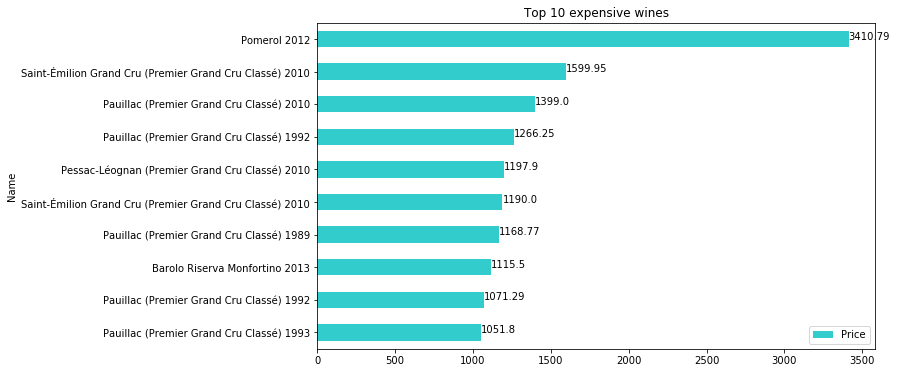

In [8]:
wines_rating = wines.loc[:, ['Name', 'Price']]
wines_rating.sort_values(by=['Price'], ascending=False,inplace=True)
top_10 = wines_rating[:10]
top_10[::-1].plot.barh(x="Name", color='#33cccc', figsize=(10, 6))
for index, value in enumerate(top_10[::-1]['Price']):
    plt.text(value, index, str(value))
plt.title("Top 10 expensive wines")

In [31]:
pomerol = wines[wines['Name'] == 'Pomerol 2012']
pomerol

Name Country   Region                                 Winery  \
237    Pomerol 2012  France  Pomerol                         Château Plince   
579    Pomerol 2012  France  Pomerol               Château Latour à Pomerol   
2345   Pomerol 2012  France  Pomerol                      Château Taillefer   
3403   Pomerol 2012  France  Pomerol                  Château Chantalouette   
4322   Pomerol 2012  France  Pomerol      Château Prieurs de la Commanderie   
4757   Pomerol 2012  France  Pomerol                  Château Certan de May   
7342   Pomerol 2012  France  Pomerol                  Château La Providence   
9160   Pomerol 2012  France  Pomerol                        Clos du Clocher   
12426  Pomerol 2012  France  Pomerol                                 Pétrus   
12945  Pomerol 2012  France  Pomerol  Château La Grave (Trigant de Boisset)   
13003  Pomerol 2012  France  Pomerol               Château Gombaude-Guillot   

       Rating  NumberOfRatings    Price  Year Type CODE  
237       4.1              525    33.90  2012  Red  FRA  
579       4.3              139   101.74  2012  Red  FRA  
2345      3.8              393    36.11  2012  Red  FRA  
3403      3.9              769    36.11  2012  Red  FRA  
4322      4.2               67    33.90  2012  Red  FRA  
4757      4.3              151    95.53  2012  Red  FRA  
7342      4.3               47    80.15  2012  Red  FRA  
9160      4.0              184    68.23  2012  Red  FRA  
12426     4.7              204  3410.79  2012  Red  FRA  
12945     4.1              150    48.54  2012  Red  FRA  
13003     4.1              109    68.81  2012  Red  FRA

#### Question 4. Which country consumes wines the most? 

In [10]:
wines['Country'].nunique()

33

In [11]:
wines['Country'].unique()

array(['Australia', 'Spain', 'South Africa', 'France', 'United States',
       'Argentina', 'Italy', 'Brazil', 'Germany', 'Greece', 'Chile',
       'New Zealand', 'Portugal', 'Switzerland', 'Austria', 'Lebanon',
       'Moldova', 'Georgia', 'Turkey', 'Romania', 'Slovenia',
       'Luxembourg', 'Hungary', 'Israel', 'Uruguay', 'Canada',
       'United Kingdom', 'Mexico', 'Czech Republic', 'Croatia',
       'Slovakia', 'China', 'Bulgaria'], dtype=object)

In [12]:
dict = {
        'Australia': 'AUS',
        'Spain': 'ESP',
        'South Africa': 'ZAF',
        'France': 'FRA',
        'United States': 'USA',
        'Argentina': 'ARG',
        'Italy': 'ITA',
        'Brazil': 'BRA',
        'Germany': 'DEU',
        'Greece' : 'GRC',
        'Chile': 'CHL',
        'New Zealand': 'NZL',
        'Portugal': 'PRT',
        'Switzerland': 'CHE',
        'Austria': 'AUT',
        'Lebanon': 'LBN',
        'Moldova': 'MDA',
        'Georgia': 'GEO',
        'Turkey' : 'TUR',
        'Romania': 'ROU',
        'Slovenia': 'SVN',
        'Luxembourg': 'LUX',
        'Hungary': 'HUN',
        'Israel': 'ISR',
        'Uruguay': 'URY',
        'Canada': 'CAN',
        'United Kingdom': 'GBR',
        'Mexico': 'MEX',
        'Czech Republic': 'CZE',
        'Croatia': 'HRV',
        'Slovakia': 'SVK',
        'China': 'CHN',
        'Bulgaria': 'BGR'
}


In [13]:
wines['CODE'] = wines['Country'].map(dict)
wines.head()

Name        Country       Region  \
0               Chardonnay 2018      Australia     Riverina   
1        Salanques Priorat 2016          Spain      Priorat   
2           Reserve Merlot 2016   South Africa   Walker Bay   
3          Ventoux Artemia 2015         France      Ventoux   
4  Devil's Candy Red Blend 2017  United States  Napa Valley   

                 Winery  Rating  NumberOfRatings  Price  Year   Type CODE  
0             Pokerface     3.4               30   7.35  2018  White  AUS  
1              Mas Doix     4.1              374  35.70  2016    Red  ESP  
2              Creation     4.0               52  36.00  2016    Red  ZAF  
3       Château Pesquie     4.0              125  32.90  2015    Red  FRA  
4  689 - Six Eight Nine     4.4               83  38.50  2017    Red  USA

In [14]:
wines_filtered = wines['Country'].value_counts().to_frame()
wines_filtered = wines_filtered.reset_index()
wines_filtered.columns = ['Country', 'Value']
wines_filtered['CODE'] = wines_filtered['Country'].map(dict)
wines_filtered.head()

Country  Value CODE
0         Italy   3636  ITA
1        France   3144  FRA
2         Spain   1483  ESP
3       Germany   1176  DEU
4  South Africa    833  ZAF

In [15]:
fig = go.Figure(data=go.Choropleth(
    locations=wines_filtered['CODE'], # Spatial coordinates
    z = wines_filtered['Value'].astype(float), # Data to be color-coded
    locationmode = 'ISO-3', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Quantity",
))

fig.update_layout(
    title_text = 'Total Consumption by Country',
    geo_scope='world', # determine map scope
)

fig.show()

From the map can be concluded that Europe is the biggest consumer with Italians on the top

#### Question 5. Is there a relationship between wine rating and price?

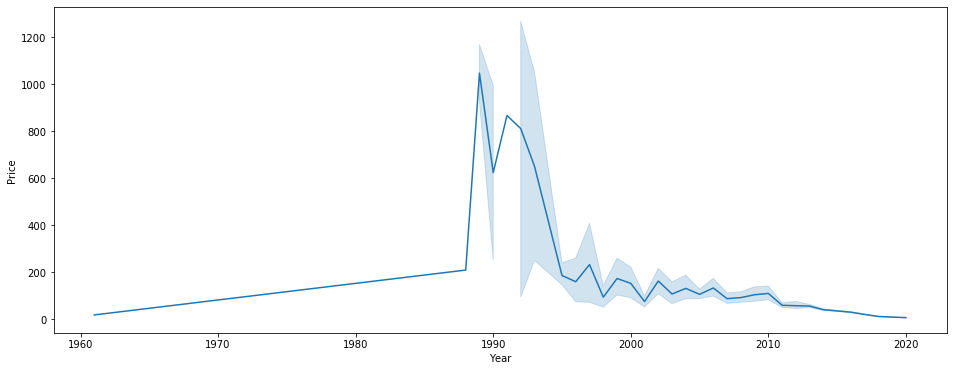

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(wines['Year'], wines['Price'])

#### Questin 6. Which Winery generates the most gross revenue?

In [26]:
winery_revenue = wines[['Winery', 'Price']]
winery_revenue = winery_revenue.groupby(['Winery'], as_index=False).sum()
winery_revenue = winery_revenue.sort_values(by=['Price'], ascending=False)
winery_revenue

Winery    Price
1655                       Gaja  8280.13
857   Château Mouton Rothschild  7111.02
709          Château Haut-Brion  5629.81
763   Château Lafite Rothschild  5095.05
2483                   Penfolds  3892.93
...                         ...      ...
1193                  Crin Roja     4.25
2242                     Maximo     4.16
303         Bodegas Victorianas     3.99
2210                 Mas Janeil     3.70
1836             Isidro Milagro     3.70

[3341 rows x 2 columns]

In [27]:
import plotly.express as px

In [29]:
df = px.data.tips()
fig = px.treemap(winery_revenue, path=['Winery'], values='Price')
fig.show()

In [44]:
gaja = wines[wines['Winery'] == 'Gaja']
gaja

Name Country  \
297                               Rossj-Bass Langhe 2018   Italy   
533                   Ca'Marcanda Vistamare Toscana 2017   Italy   
938                               Rossj-Bass Langhe 2017   Italy   
1303                                     Barbaresco 2016   Italy   
1789                                     Barbaresco 2012   Italy   
2146                Sorì Tildìn (Barbaresco) Langhe 2013   Italy   
2188                             Ca'Marcanda Magari 2017   Italy   
2463                Costa Russi (Barbaresco) Langhe 2013   Italy   
2540                                Conteisa Langhe 2011   Italy   
2927                      Alteni di Brassica Langhe 2014   Italy   
3454                Costa Russi (Barbaresco) Langhe 2011   Italy   
3608                     Ca'Marcanda Promis Toscana 2017   Italy   
3736   Pieve Santa Restituta Brunello di Montalcino 2015   Italy   
4210                                  Sperss Langhe 2014   Italy   
4238                               Sorì San Lorenzo 2016   Italy   
5316                            Sito Moresco Langhe 2016   Italy   
5937                      Alteni di Brassica Langhe 2017   Italy   
6157   Pieve Santa Restituta Sugarille Brunello di Mo...   Italy   
6438   Pieve Santa Restituta Rennina Brunello di Mont...   Italy   
6464                               Sorì San Lorenzo 2014   Italy   
6536                                  Sperss Barolo 2015   Italy   
6692                               Sorì San Lorenzo 2013   Italy   
6942                            Sito Moresco Langhe 2017   Italy   
7444                                     Barbaresco 2014   Italy   
7624                      Alteni di Brassica Langhe 2015   Italy   
7953                              Gaia & Rey Langhe 2017   Italy   
8067   Pieve Santa Restituta Rennina Brunello di Mont...   Italy   
8620                                  Sperss Langhe 2011   Italy   
8855                Sorì Tildìn (Barbaresco) Langhe 2016   Italy   
9065                Costa Russi (Barbaresco) Langhe 2016   Italy   
9150                           Ca'Marcanda Bolgheri 2016   Italy   
10072               Sorì Tildìn (Barbaresco) Langhe 2014   Italy   
10779                     Alteni di Brassica Langhe 2016   Italy   
10866                               Dagromis Barolo 2015   Italy   
10991                 Ca'Marcanda Vistamare Toscana 2018   Italy   
11040  Pieve Santa Restituta Sugarille Brunello di Mo...   Italy   
11862  Pieve Santa Restituta Brunello di Montalcino 2014   Italy   
11973               Sorì Tildìn (Barbaresco) Langhe 2010   Italy   
12074                                    Barbaresco 2013   Italy   
12471                 Ca'Marcanda Vistamare Toscana 2016   Italy   
12626  Pieve Santa Restituta Sugarille Brunello di Mo...   Italy   
12680  Pieve Santa Restituta Brunello di Montalcino 2012   Italy   

                       Region Winery  Rating  NumberOfRatings   Price  Year  \
297                    Langhe   Gaja     4.4              263   62.95  2018   
533                   Toscana   Gaja     4.2              684   41.90  2017   
938                    Langhe   Gaja     4.2              605   83.15  2017   
1303               Barbaresco   Gaja     4.5              349  179.00  2016   
1789               Barbaresco   Gaja     4.5             1593  149.00  2012   
2146                   Langhe   Gaja     4.5              149  450.00  2013   
2188                 Bolgheri   Gaja     4.3              402   42.50  2017   
2463                   Langhe   Gaja     4.4               84  430.00  2013   
2540                   Langhe   Gaja     4.2              123  219.00  2011   
2927                   Langhe   Gaja     4.2              158   95.06  2014   
3454                   Langhe   Gaja     4.6               76  520.00  2011   
3608                  Toscana   Gaja     4.0             1083   30.90  2017   
3736   Brunello di Montalcino   Gaja     4.5               72   59.90  2015   
4210                 

#### Question 7. Which Winery has the highest rating on avarage? 

In [33]:
winery_rating = wines[['Winery', 'Rating']]
winery_rating = winery_rating.groupby(['Winery'], as_index=False).mean()
winery_rating = winery_rating.sort_values(by=['Rating'], ascending=False)
winery_rating

Winery    Rating
2229            Masseto  4.733333
1211   Dal Forno Romano  4.700000
2600             Pétrus  4.700000
2588         Promontory  4.700000
1680   Giacomo Conterno  4.700000
...                 ...       ...
1193          Crin Roja  2.900000
444   Cape Town Wine Co  2.866667
561   Château Amandiers  2.800000
2509             Piazzo  2.700000
424    Cantina di Soave  2.700000

[3341 rows x 2 columns]

In [39]:
masseto = wines[wines['Winery'] == 'Masseto']
masseto

Name Country   Region   Winery  Rating  NumberOfRatings   Price  \
792   Toscana 2013   Italy  Toscana  Masseto     4.7              538  965.15   
5205  Toscana 2016   Italy  Toscana  Masseto     4.8               85  960.17   
9599  Toscana 2011   Italy  Toscana  Masseto     4.7              628  965.15   

      Year Type CODE  
792   2013  Red  ITA  
5205  2016  Red  ITA  
9599  2011  Red  ITA

In [45]:
gaja_rat = winery_rating[winery_rating['Winery'] == 'Gaja']
gaja_rat

Winery    Rating
1655   Gaja  4.366667

## Conclusion

Peolple prefer on most red wines, followed by white and other tastes. Their preferences are towards wines produced in the 90's of the last century. Europe is the biggest wine consumer with Italians on the top. The highly rated winery is also Italian with 4.7 rating points, which 0.90 points higher than the average rating on 5 rating scale. Although it is the highest rated winery it does not generate the most gross revenue. On the top of this indicator is Gaja, again Italian winery with average rating of 4.36, which has 0.34 point lower rating. The most emxpensive wine is French Pomerol with price almost 100 times higher than the average price.